In [7]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import pyvista as pv

In [8]:
src = './inp/'
filename= 'depth_map_img_lbl.png'
#filename = 'Test.1423_Depth.png'
img = cv2.imread(src+filename)

def normalized(img_arr):
    nimg_arr = (img_arr-img_arr.min())/(img_arr.max()-img_arr.min())
    return nimg_arr

def imshow(img_arr):
    plt.figure(figsize=(7,7))
    plt.imshow(img_arr,cmap='gray')
    plt.axis('off')
    plt.show()
    
def scatter(x,y):
    plt.figure(figsize=(10,10))
    plt.scatter(x,y,marker='o',s=0.2)
    plt.axis('off')
    plt.show()

def find_edge(img_arr,val1=20,val2=120):
    return cv2.Canny(img_arr,val1,val2)

In [9]:
img = Image.open(src+filename)
img = np.array(img)
#img = cv2.GaussianBlur(img,(13,13),0)
#img = cv2.GaussianBlur(img,(13,13),0)
nimg = normalized(img)

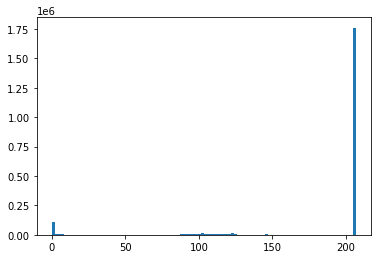

In [10]:
_ = plt.hist(img.flatten(),bins=100)
#_ = plt.xticks([0,.2,.4,.6,.8,1])

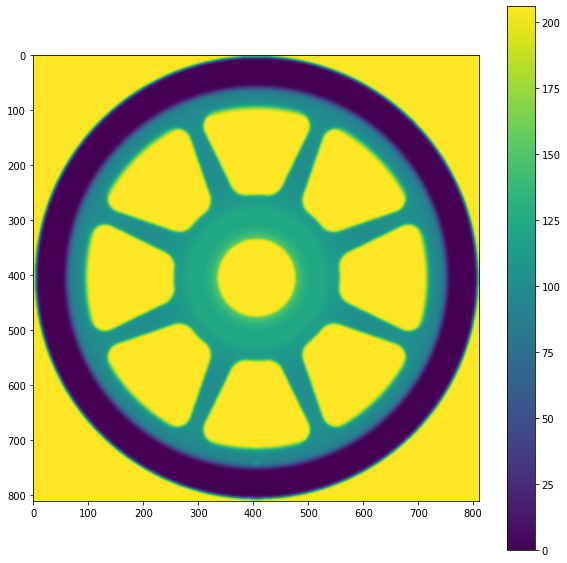

In [11]:
plt.figure(figsize=(10,10))
edg_im = find_edge(img,val1=180,val2=200)

(edg_x,edg_y) = np.where(edg_im == edg_im.max())

crop_im = img[edg_x.min()-5:edg_x.max()+5,edg_y.min()-5:edg_y.max()+5]
crop_im = cv2.GaussianBlur(crop_im,(13,13),0)
plt.imshow(crop_im)
plt.colorbar()


pix 2 pntcld

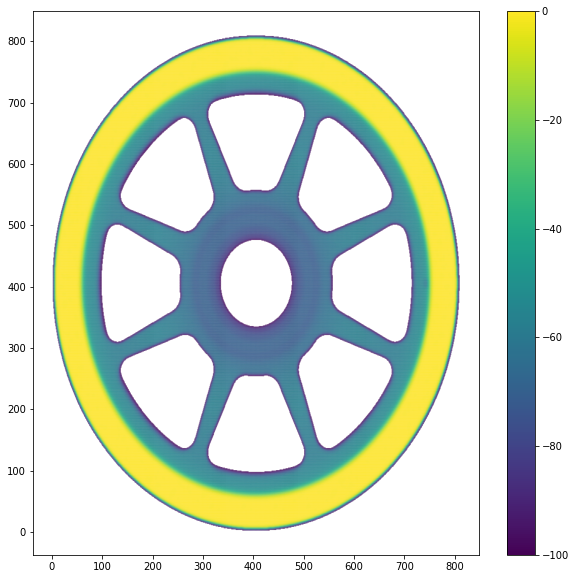

In [12]:
x,y = np.where(crop_im<=175)
z = -normalized(crop_im[x,y])*100

plt.figure(figsize=(10,10))
plt.scatter(x,y,c=z,s=.1,marker='.')
plt.colorbar()

In [13]:
def plot_pcd(x,y,z):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(121, projection='3d')
    ax.scatter(x,y,z,c=z,cmap='jet',marker='.')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.view_init(90,90)
    
    ax = fig.add_subplot(122, projection='3d')
    ax.scatter(x,y,z,c=z,cmap='jet',marker='.')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.view_init(75,0)

In [14]:
points = np.array([x,y,z],dtype=np.float32).T
print(points.shape)

(319493, 3)


(100000, 3)


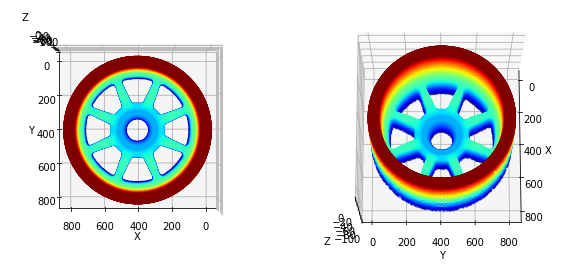

In [15]:
smp_idx = np.linspace(0,points.shape[0]-1,10**5,dtype = int)
plot_pcd(points[smp_idx,0],points[smp_idx,1],points[smp_idx,2])
decimated_points = np.array([points[smp_idx,0],points[smp_idx,1],points[smp_idx,2]],dtype=np.float32).T
print(decimated_points.shape)

In [16]:
cloud = pv.PolyData(decimated_points)
cloud.plot(point_size=3)


ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [24]:
surf = cloud.delaunay_2d()
surf.plot(show_edges=False)
          
surf.save('{}.stl'.format(filename[:-4]))

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [19]:
import open3d as o3d

In [21]:
o3d.visualization.draw_geometries([decimated_points],
                                  zoom=0.664,
                                  front=[-0.4761, -0.4698, -0.7434],
                                  lookat=[1.8900, 3.2596, 0.9284],
                                  up=[0.2304, -0.8825, 0.4101])

AttributeError: 'open3d.open3d.visualization.RenderOption' object has no attribute 'mesh_show_wireframe'

In [2]:
mesh = o3dtut.get_bunny_mesh()
pcd = mesh.sample_points_poisson_disk(750)
o3d.visualization.draw_geometries([pcd])
alpha = 0.03
print(f"alpha={alpha:.3f}")
mesh = o3d.geometry.TriangleMesh.create_from_point_cloud_alpha_shape(pcd, alpha)
mesh.compute_vertex_normals()
o3d.visualization.draw_geometries([mesh], mesh_show_back_face=True)

downloading bunny mesh


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\user\\Desktop\\전기차_과제\\../test_data/Bunny.ply.tar.gz'

In [22]:
import numpy as np
import pyvista as pv

# points is a 3D numpy array (n_points, 3) coordinates of a sphere
cloud = pv.PolyData(decimated_points)
cloud.plot()

volume = cloud.delaunay_3d(alpha=40.)
shell = volume.extract_geometry()
shell.plot()

  Attempting uninstall: open3d
    Found existing installation: open3d 0.8.0.0
    Uninstalling open3d-0.8.0.0:
      Successfully uninstalled open3d-0.8.0.0


ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'c:\\users\\user\\anaconda3\\envs\\soyoung_env\\lib\\site-packages\\~pen3d\\open3d.cp36-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [ ]:
filename[:-4]